In [23]:
import nltk
from nltk import pos_tag, word_tokenize, sent_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/louis/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/louis/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

# Preprocessig & text extraction

In [24]:
def read_file(file_name):
    with open(file_name) as f:
        lines = f.readlines()
    return lines

path = './data/book_text'

text = read_file(path)

# remove all the \n in the text
text = [x.strip() for x in text]
text = ' '.join(text)
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
sentences = tokenizer.tokenize(text)
words = nltk.tokenize.word_tokenize(text)
words[:15]

['PART',
 'ONE',
 'CHAPTER',
 'I',
 'A',
 'SHIFTING',
 'REEF',
 'The',
 'year',
 '1866',
 'was',
 'signalised',
 'by',
 'a',
 'remarkable']

# Entity extraction

In [17]:
# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# ner_categories = defaultdict(int)
# print(ner_categories)

# Test for stems of the tree with 'NE' tags
i = 0
for sent in chunked_sentences:
    # sent type= nltk.tree.Tree
    print('Sentence =',sent)
    p ='NEs = ';
    for chunk in sent:
        if hasattr(chunk, "label"):
            p+=str(chunk)+' '
    print()
    print(p)
    print()
    print()

    i+=1
    if i == 10:
        break

Sentence = (S
  (NE PART/NN)
  ONE/CD
  CHAPTER/NN
  I/PRP
  A/VBP
  (NE SHIFTING/JJ)
  REEF/NNP
  The/DT
  year/NN
  1866/CD
  was/VBD
  signalised/VBN
  by/IN
  a/DT
  remarkable/JJ
  incident/NN
  ,/,
  a/DT
  mysterious/JJ
  and/CC
  puzzling/VBG
  phenomenon/NN
  ,/,
  which/WDT
  doubtless/VBZ
  no/DT
  one/NN
  has/VBZ
  yet/RB
  forgotten/VBN
  ./.)

NEs = (NE PART/NN) (NE SHIFTING/JJ) 


Sentence = (S
  Not/RB
  to/TO
  mention/VB
  rumours/NNS
  which/WDT
  agitated/VBD
  the/DT
  maritime/JJ
  population/NN
  and/CC
  excited/VBD
  the/DT
  public/JJ
  mind/NN
  ,/,
  even/RB
  in/IN
  the/DT
  interior/NN
  of/IN
  continents/NNS
  ,/,
  seafaring/VBG
  men/NNS
  were/VBD
  particularly/RB
  excited/VBN
  ./.)

NEs = 


Sentence = (S
  Merchants/NNS
  ,/,
  common/JJ
  sailors/NNS
  ,/,
  captains/NNS
  of/IN
  vessels/NNS
  ,/,
  skippers/NNS
  ,/,
  both/DT
  of/IN
  (NE Europe/NNP)
  and/CC
  (NE America/NNP)
  ,/,
  naval/JJ
  officers/NNS
  of/IN
  all/DT
  countries/N

In [20]:
# print all sentences containing the character '°'
for sent in sentences:
    if '°' in sent:
        print(sent)


Fifteen days later, two thousand miles farther off, the _Helvetia_, of the Compagnie-Nationale, and the _Shannon_, of the Royal Mail Steamship Company, sailing to windward in that portion of the Atlantic lying between the United States and Europe, respectively signalled the monster to each other in 42° 15′ N. lat.
and 60° 35′ W. long.
On the 5th of March, 1867, the _Moravian_, of the Montreal Ocean Company, finding herself during the night in 27° 30′ lat.
and 72° 15′ long., struck on her starboard quarter a rock, marked in no chart for that part of the sea.
The 13th of April, 1867, the sea being beautiful, the breeze favourable, the _Scotia_, of the Cunard Company’s line, found herself in 15° 12′ long.
and 45° 37′ lat.
The 20th of July, the tropic of Capricorn was cut by 105° of longitude, and the 27th of the same month we crossed the equator on the 110th meridian.
The frigate was then in 31° 15′ north latitude and 136° 42′ east longitude.
Indeed, I shall not be sorry to eat a piece of

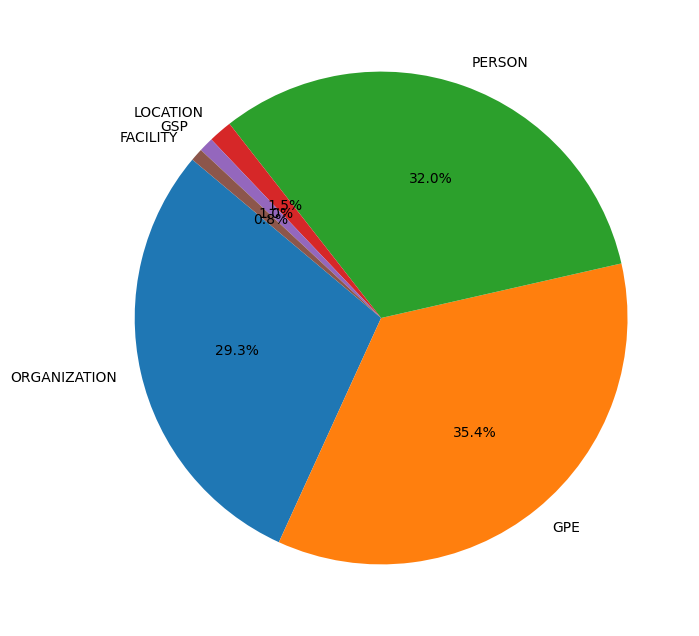

In [34]:
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            # print(chunk)
            
# Create a list from the dictionary keys for the cart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
fig = plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140);
# save pie
plt.savefig('./plots/entities_pie.png')


In [41]:
# save the Named Entities
import pickle
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)

with open('named_entities.pickle', 'wb') as f:
    for sent in chunked_sentences:
        for chunk in sent:
            if hasattr(chunk, 'label'):
                pickle.dump(chunk, f)


In [1]:
# https://towardsdatascience.com/geoparsing-with-python-and-natural-language-processing-4762a7c92f08
# https://github.com/openeventdata/mordecai/tree/master/mordecai
# import spacy
# nlp = spacy.load("en_core_web_lg")

# from mordecai import Geoparser

# places = Geoparser(locs)
# geo = Geoparser()
# locs_geo = geo.geoparse(locs)
# locs_geo
# does not work

In [52]:
from word2number import w2n                                                    

# NS WE lat long check
def check_lat_long_direction(jj, coo):
    if 'lat' in jj:
        if 'W' in coo or 'E' in coo:
            # a latitude cannot have W or E
            return ''
    if 'long' in jj:
        if 'N' in coo or 'S' in coo:
            # print('mistake'+coo+' '+jj)
            # a longitude cannot have N or S
            return ''
    return coo

                                                                               
def convert_word_to_number(word):
    word = word.replace('first','one')
    word = word.replace('second','two')
    word = word.replace('third','three')
    if word.endswith('ieth'):
        word = word[:-4]+'y'
        
    if word[-2:] == 'th':                                                       
        word = word[:-2]

    try:
        out = w2n.word_to_num(word) 
        return out
    except ValueError:
        print('error with word = ', word)
        return None

# extract all the nautical locations from the book. limitation: does not consider 'Meridian' as a location
import re                                                                      
def extract_coordinates(text):                                                 
    coordinates ={}
    coo_pattern = r'(\d{1,3})°'


    # iterate of the caracters:
    i = 0
    for t in text:
        if t == '°' or text[i:i+4] == 'deg.':

            # search if there is 'lat', 'long' in the following 20 characters
            coo = '°'
            f = i-1
            while text[f].isnumeric() or text[f] == ' ':
                if text[f] != ' ': coo = text[f]+coo
                f-=1
            # print('coo = ', coo )
            wait = 55
            b = False
            # looking in the previous WAIT characters
            for j in range(wait):
                jj = text[i-j-5: i-j].lower()

                if any(x in jj for x in ['lat.', 'long.', 'latit', 'longi']):
                    coo = jj.replace(' ','')[:3]+' '+coo+' '
                    coo+= ' '+ check_lat_long_direction(jj,contains_minutes_direction(text[i:i+wait]))
                
                    coordinates[i] =coo
                    b = True
                    break 
                if 'and' in jj or ',' in jj:
                    # we are in the middle of two coordinates
                    break

            if not b:
                for j in range(wait):
                    jj = text[i+j: i+j+5].lower()
                    if any(x in jj for x in ['lat.', 'long.', 'latit', 'longi']):
                        coo = jj.replace(' ','')[:3]+' '+coo
                        coo+= ' '+ check_lat_long_direction(jj,contains_minutes_direction(text[i:i+wait]))
                        coordinates[i]=coo
                        break 

            # handling meridian - parallel
        next_word = text[i:i+10].lower().split(' ')[0]
        if 'meridian' in next_word or'parallel' in next_word:
                # parse the previous word
                prev =  text[i-30:i].lower().split(' ')
                prev = [x for x in prev if x]
                prev = prev[-1]
                prev_nb = convert_word_to_number(prev)
                
                if prev_nb:
                    if 'meridian'in next_word:
                        coordinates[i] = 'lon '+str(prev_nb)+'°'
                    else:    
                        coordinates[i] = 'lat '+str(prev_nb)+'°'

                
        i+=1    
    return coordinates                                                         

def contains_minutes_direction(str):
    pattern_minutes = r'(\d{1,2})′'
    patter_direction = r"(\s([NSEW]\.|[nN]orth|[sS]outh|[eE]ast|[wW]est))"    
    matches_minutes = re.findall(pattern_minutes, str)
    matches_direction = re.findall(patter_direction, str)
    # select the first match
    matches_direction = [x[0] for x in matches_direction]
    # convert north, south, east, west to N, S, E, W
    if matches_direction:
        matche_direction = matches_direction[0]
        if matche_direction == ' north' or matche_direction == ' North':
            matche_direction = 'N.'
        elif matche_direction == ' south' or matche_direction == ' South':
            matche_direction = 'S.'
        elif matche_direction == ' east' or matche_direction == ' East':
            matche_direction = 'E.'
        elif matche_direction == ' west' or matche_direction == ' West':
            matche_direction = 'W.'
    match = ''
    if matches_minutes:     match+= matches_minutes[0]+"'"   
    if matches_direction:   match+= ' '+matche_direction.replace('.','')
    return match



sample_text = "Merchants, without leaving the fifty-second meridian. common sailors, in the matter 37° 53′ W. long., 122° 28′ N. lat.  Merchants, common sailors, consulted the planisphere, and in 32° 40′ north lat. and 157° 50′ west long., I foundcaptains Cancer at 172° long. On of vessels, skippers, between 15° and 2° S. lat., and 164 deg. and 168° long. We passed both of Europe and America, naval officers of all countries, and the in latitude 47° 24′, longitude 17° 28′, that this vessel in 31° 15′ north latitude and 136° 42′ east longitude. TheGovernments of several states on the two continents, were deeply interested by 105° of longitude, and the in the matter. the thermometer exposed to the air marked 2 deg. or 3° below zero, but we were warmly clad"

coordinates = extract_coordinates(sample_text)   
for n in coordinates.keys():
    print(coordinates[n])

# limitation: between 15° and 2° S. lat., and 164 deg. and 168° long.
# it is encoded that there must be a 'lat' or 'long' in the next 20 characters, to avoid false positives, for example 'water temperature 2° below zero'

lon 52°
lon 37° 53'  W
lat 122° 28'  N
lat 32° 40' N
lon 157° 50' W
lon 172° 
lat 15°   S
lat 2°   S
lon 164° 
lon 168° 
lat 47°  24'
lon 17°  
lat 31° 15' N
lon 136° 42' E
lon 105° 


In [50]:
# extract all the nautical locations from the book

book_coordinates = extract_coordinates(text)
# print the 10 first coordinates
# for i in list(book_coordinates.keys()):
#     print(book_coordinates[i])
    
# convert to a dataframe
import pandas as pd
df = pd.DataFrame.from_dict(book_coordinates, orient='index')
df.columns = ['coordinates']
# split the coordinates into degrees, minutes, direction
df['degrees'] = df['coordinates'].str.extract(r'(\d{1,3})°') 
df['minutes'] = df['coordinates'].str.extract(r'(\d{1,3})\'')
df['direction'] = df['coordinates'].str.extract(r'([NSEW]|[nN]orth|[sS]outh|[eE]ast|[wW]est)')  
df['type'] = df['coordinates'].str.extract(r'(lat|lon)')
df.tail(15)


error with word =  kept
error with word =  run
error with word =  the
error with word =  u
error with word =  un
error with word =  whose
error with word =  every
error with word =  the
error with word =  the
error with word =  the
error with word =  the


,coordinates,degrees,minutes,direction,type
448844,lat 60°,60,NaN,NaN,lat
450406,lon 50°,50,NaN,NaN,lon
453304,lon 51°,51,NaN,NaN,lon
453322,lat 67° 39' S,67,39,S,lat
461155,lon 52°,52,NaN,NaN,lon
461172,lat 67° 30',67,30,NaN,lat
461184,lat 90°,90,NaN,NaN,lat
465680,lat 60°,60,NaN,NaN,lat
467829,lon 167°,167,NaN,NaN,lon
467850,lat 77° 32',77,32,NaN,lat


In [51]:

# concatenate the long and lat coordinates based on their proximity
df_concat = pd.DataFrame(columns=['coordinates', 'degrees_lat', 'minutes_lat', 'directio_lat', 'degrees_lon', 'minutes_lon', 'directio_lon'])
i = 0
while i < len(df):
    if df.iloc[i]['type'] == 'lat':
        df_concat.loc[i, ['degrees_lat', 'minutes_lat', 'directio_lat']] = [df.iloc[i]['degrees'], df.iloc[i]['minutes'], df.iloc[i]['direction']]
    else:
        df_concat.loc[i, ['degrees_lon', 'minutes_lon', 'directio_lon']] = [df.iloc[i]['degrees'], df.iloc[i]['minutes'], df.iloc[i]['direction']]
    
    df_concat.loc[i, 'coordinates'] = df.iloc[i]['coordinates']
    df_concat.loc[i, 'type'] = df.iloc[i]['type']
    i+=1

df_concat.index = df.index

# merge rows based on their proximity in the index, if the difference is less than 30
i = 0
while i < len(df_concat)-1:
    if df_concat.index[i+1] - df_concat.index[i] < 30:
        if df_concat.iloc[i]['type'] == 'lat' and df_concat.iloc[i+1]['type'] == 'lon':
            df_concat.loc[df_concat.index[i], ['degrees_lon', 'minutes_lon', 'directio_lon']] = [df_concat.iloc[i+1]['degrees_lon'], df_concat.iloc[i+1]['minutes_lon'], df_concat.iloc[i+1]['directio_lon']]
            df_concat.loc[df_concat.index[i], 'coordinates'] = df_concat.iloc[i]['coordinates']+' '+df_concat.iloc[i+1]['coordinates']
            df_concat.drop(df_concat.index[i+1], inplace=True)
        elif df_concat.iloc[i]['type'] == 'lon' and df_concat.iloc[i+1]['type'] == 'lat':
            df_concat.loc[df_concat.index[i], ['degrees_lat', 'minutes_lat', 'directio_lat']] = [df_concat.iloc[i+1]['degrees_lat'], df_concat.iloc[i+1]['minutes_lat'], df_concat.iloc[i+1]['directio_lat']]
            df_concat.loc[df_concat.index[i], 'coordinates'] = df_concat.iloc[i+1]['coordinates']+' '+df_concat.iloc[i]['coordinates']
            df_concat.drop(df_concat.index[i+1], inplace=True)
        elif df_concat.iloc[i]['type'] == 'lat' and df_concat.iloc[i+1]['type'] == 'lat':
            # average the two latitudes
            df_concat.loc[df_concat.index[i], ['degrees_lat']] = str((int(df_concat.iloc[i]['degrees_lat'])+int(df_concat.iloc[i+1]['degrees_lat']))/2)
            try:   df_concat.loc[df_concat.index[i], ['minutes_lat']] = str((int(df_concat.iloc[i]['minutes_lat'])+int(df_concat.iloc[i+1]['minutes_lat']))/2)
            except:  None
            try:  df_concat.loc[df_concat.index[i], ['directio_lat']] = df_concat.iloc[i]['directio_lat']
            except:  None
        elif df_concat.iloc[i]['type'] == 'lon' and df_concat.iloc[i+1]['type'] == 'lon':
            # average the two longitudes
            df_concat.loc[df_concat.index[i], ['degrees_lon']] = str((int(df_concat.iloc[i]['degrees_lon'])+int(df_concat.iloc[i+1]['degrees_lon']))/2)
            try:   df_concat.loc[df_concat.index[i], ['minutes_lon']] = str((int(df_concat.iloc[i]['minutes_lon'])+int(df_concat.iloc[i+1]['minutes_lon']))/2)
            except:  None
            try:  df_concat.loc[df_concat.index[i], ['directio_lon']] = df_concat.iloc[i]['directio_lon']
            except:  None
            
    i+=1

# equivalent to the above code but without using dataframes
# concatenate the long and lat coordinates based on their proximity
# max_index_distance = 30
# concat_coordinates = {}
# keys = list(book_coordinates.keys())
# for i in keys:
#     for j in keys:
#         if i in book_coordinates and j in book_coordinates:
#             if i != j and abs(i-j) < max_index_distance:
#                 if 'lat' in book_coordinates[i] and 'lon' in book_coordinates[j]:
#                     book_coordinates[i] = book_coordinates[i]+' '+book_coordinates[j]
#                     book_coordinates.pop(j)
#                     break
# # print the 10 first coordinates
# for i in list(book_coordinates.keys()):
#     print(book_coordinates[i])

df_concat.drop(['type'], axis=1, inplace=True)

# save the coordinates to a csv file
df_concat.to_csv('./data/coordinates.csv')
print(len(df_concat))
df_concat.head(50)



41


,coordinates,degrees_lat,minutes_lat,directio_lat,degrees_lon,minutes_lon,directio_lon
3340,lat 42° 15' N lon 60° 35' W,42,15,N,60,35,W
7347,lat 27° 30' lon 72° 15',27,30,NaN,72,15,NaN
8877,lat 45° 37' lon 15° 12',45,37,NaN,15,12,NaN
44393,lon 105°,NaN,NaN,NaN,105,NaN,NaN
44476,lon 110°,NaN,NaN,NaN,110,NaN,NaN
48184,lat 31° 15' N lon 136° 42' E,31,15,N,136,42,E
155928,lat 32° 40' N lon 157° 50' W,32,40,N,157,50,W
190947,lat 30°,30,NaN,NaN,NaN,NaN,NaN
192389,lon 172°,NaN,NaN,NaN,172,NaN,NaN
193105,lon 142°,NaN,NaN,NaN,142,NaN,NaN
